In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
import skfuzzy as fuzz

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data')
country_data = pd.read_csv('country_wise_latest.csv')

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])

for column in country_data.columns:
    if country_data[column].dtype == type(object):
        country_data[column] = le.fit_transform(country_data[column])

# Xử lý giá trị vô cùng
country_data.replace([np.inf, -np.inf], np.nan, inplace=True)
country_data.fillna(country_data.mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
crx_data_scaled = pd.DataFrame(scaler.fit_transform(crx_data), columns=crx_data.columns)
country_data_scaled = pd.DataFrame(scaler.fit_transform(country_data), columns=country_data.columns)

# Phân cụm dữ liệu bằng Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
crx_data['cluster_agg'] = agg_clustering.fit_predict(crx_data_scaled)
country_data['cluster_agg'] = agg_clustering.fit_predict(country_data_scaled)

# Phân cụm dữ liệu bằng KMeans
kmeans = KMeans(n_clusters=3)
crx_data['cluster_kmeans'] = kmeans.fit_predict(crx_data_scaled)
country_data['cluster_kmeans'] = kmeans.fit_predict(country_data_scaled)

# Phân cụm dữ liệu bằng Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(crx_data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)
crx_data['cluster_fuzzy_cmeans'] = np.argmax(u, axis=0)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(country_data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)
country_data['cluster_fuzzy_cmeans'] = np.argmax(u, axis=0)

# Phân cụm dữ liệu bằng DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
crx_data['cluster_dbscan'] = dbscan.fit_predict(crx_data_scaled)
country_data['cluster_dbscan'] = dbscan.fit_predict(country_data_scaled)

# In ra kết quả
print(crx_data.head())
print('-----------------------------------------------------------------------')
print(country_data.head())

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   b  30.83      0  u  g   w  v  1.25  t  t.1  01  f  g.1  00202  0.1  +  \
0  1    327  4.460  2  1  11  4  3.04  1    1   6  0    0     11  560  0   
1  1     89  0.500  2  1  11  4  1.50  1    0   0  0    0     95  824  0   
2  2    125  1.540  2  1  13  8  3.75  1    1   5  1    0     31    3  0   
3  2     43  5.625  2  1  13  8  1.71  1    0   0  0    2     37    0  0   
4  2    167  4.000  2  1  10  8  2.50  1    0   0  1    0    114    0  0   

   cluster_agg  cluster_kmeans  cluster_fuzzy_cmeans  cluster_dbscan  
0            1               1                     0              -1  
1            0               2                     0              -1  
2            1               1                     0              -1  
3            0               2                     0              -1  
4            0               1                     0              -1  
-----------------------------------------------------------------------
   Country/Region  Confirmed  Deaths  Recover

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

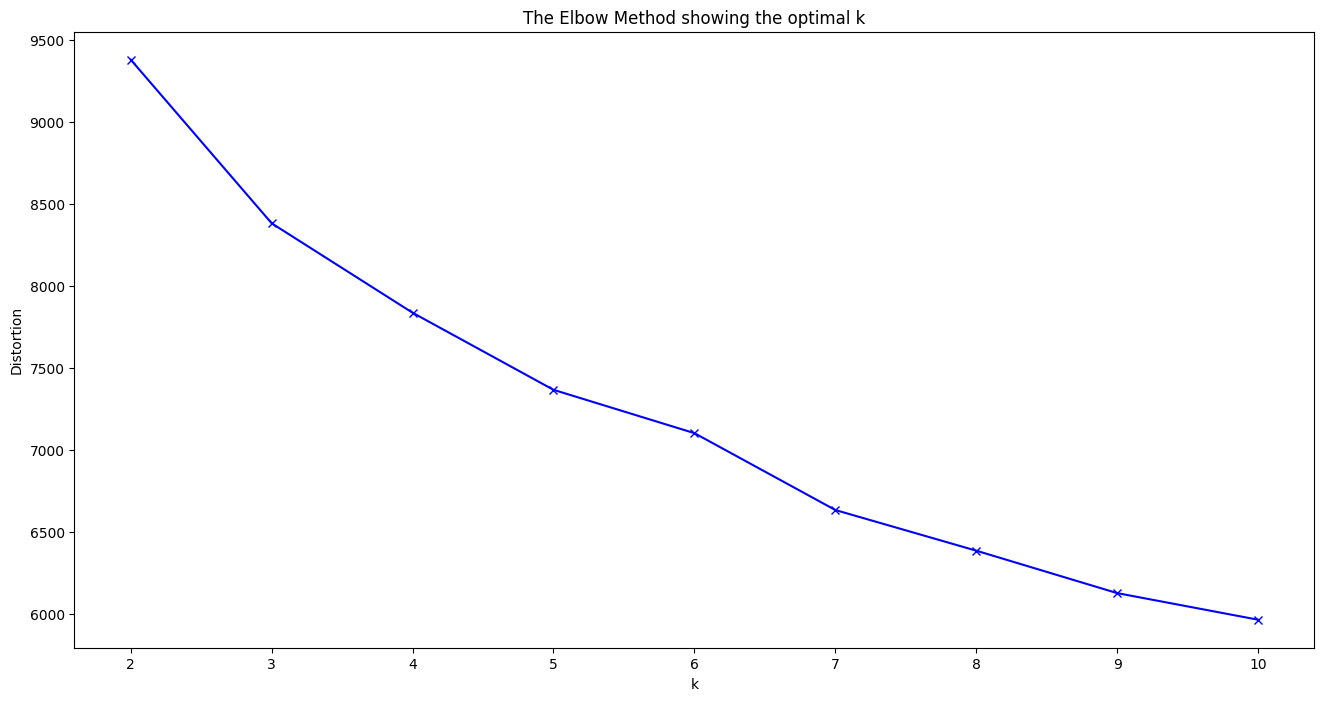

Optimal number of clusters:  10


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data', header=None)

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])

# Xử lý giá trị vô cùng
crx_data.replace([np.inf, -np.inf], np.nan, inplace=True)
crx_data.fillna(crx_data.mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
crx_data_scaled = pd.DataFrame(scaler.fit_transform(crx_data), columns=crx_data.columns)

# Tính tổng bình phương khoảng cách
distortions = []
K = range(2, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(crx_data_scaled)
    distortions.append(kmeanModel.inertia_)

# Vẽ biểu đồ phương pháp khuỷu tay
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Tìm và in ra số lượng cụm tối ưu
optimal_k = distortions.index(min(distortions)) + 2
print("Optimal number of clusters: ", optimal_k)

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

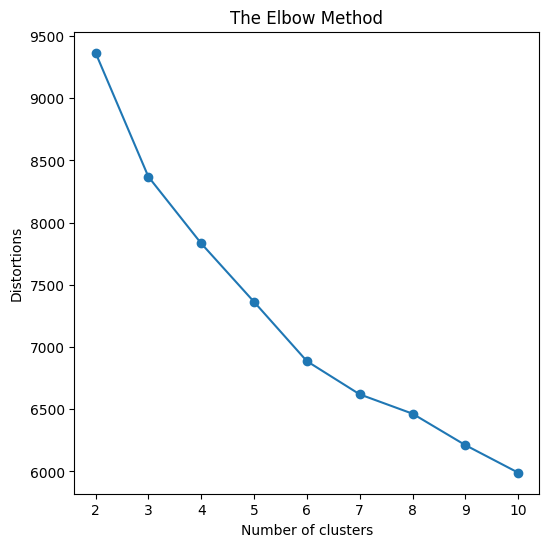

Số cụm tối ưu: 7


In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
X = crx_data_scaled

# Tính tổng bình phương khoảng cách cho một loạt các giá trị k
distortions = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), distortions, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()
# Tính đạo hàm thứ hai của các biến dạng
diff = np.diff(distortions)
diff2 = np.diff(diff)

# Tìm 'elbow'
elbow = np.argmin(diff2) + 2

print('Số cụm tối ưu:', elbow)

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


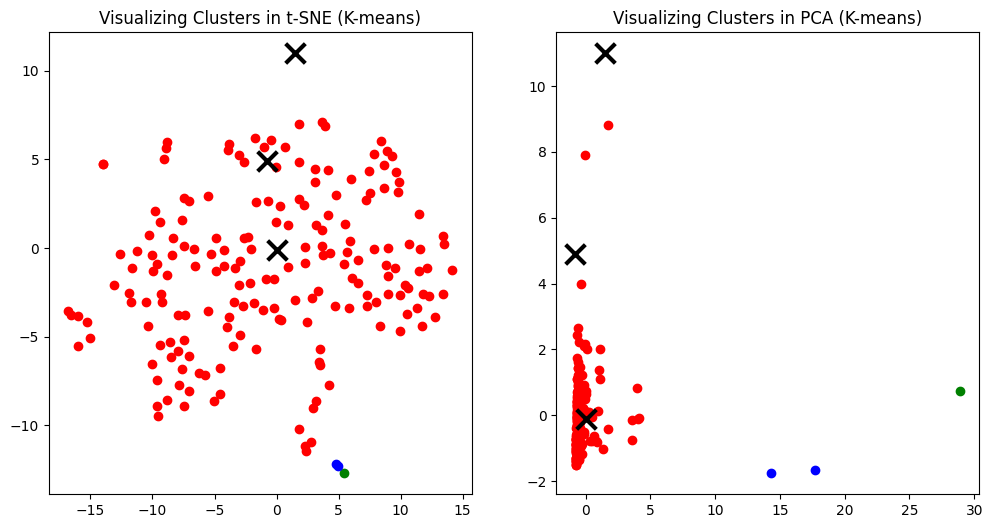

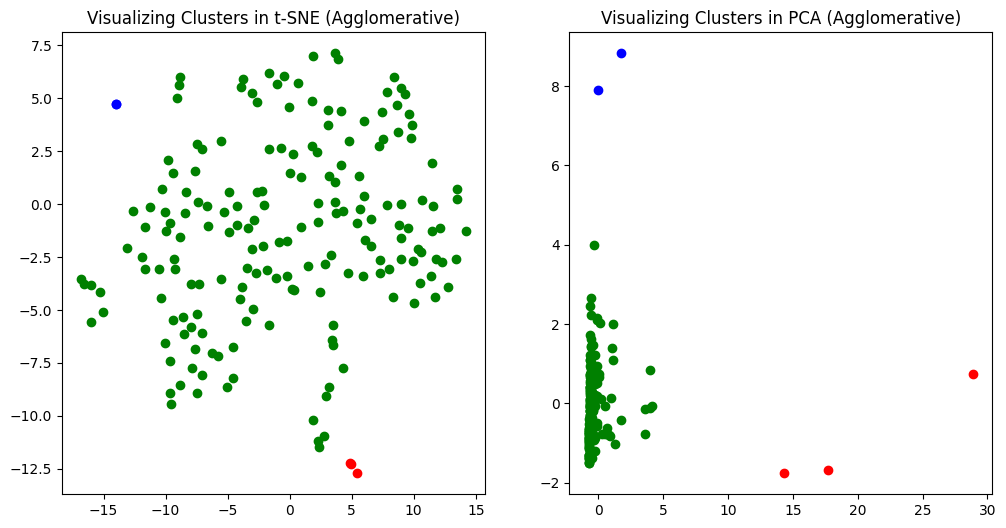

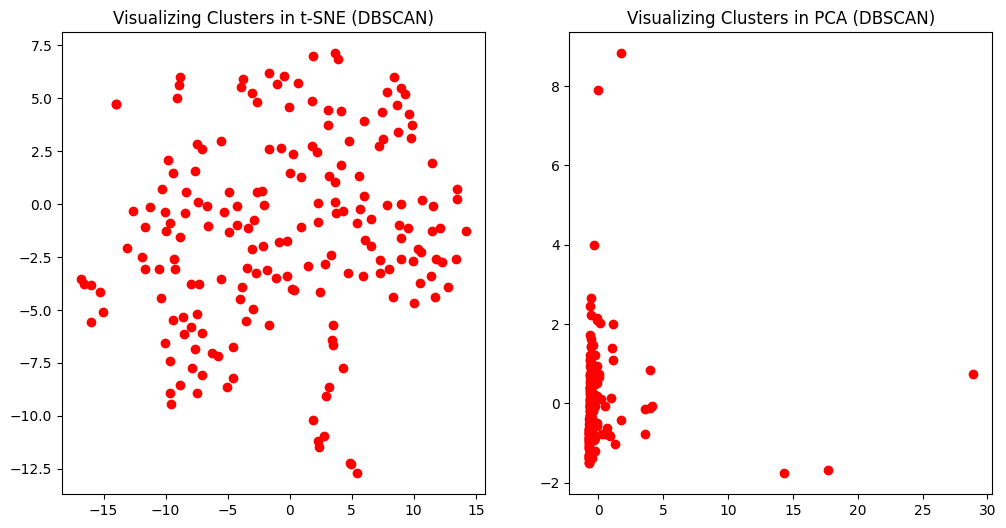

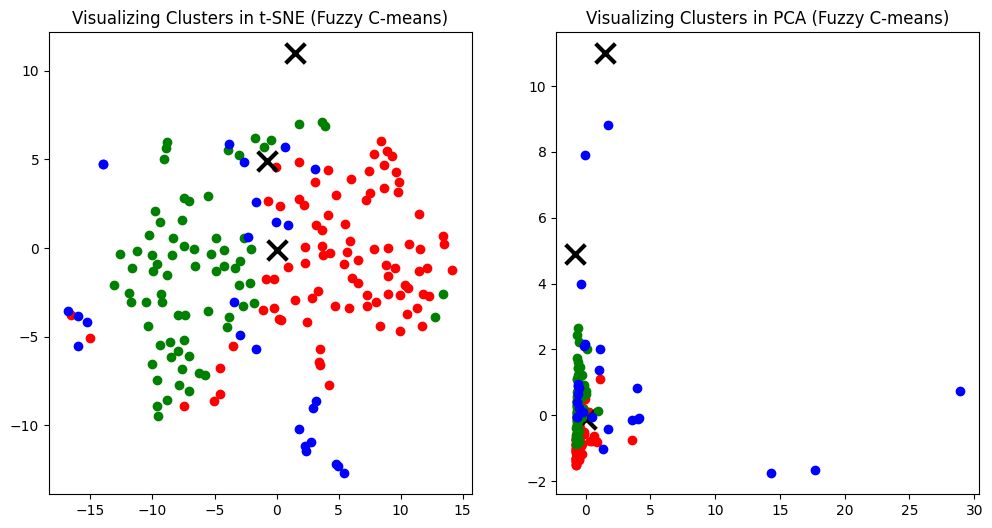

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import skfuzzy as fuzz

# Đọc dữ liệu
data = pd.read_csv('country_wise_latest.csv')

# Khởi tạo LabelEncoder
le = LabelEncoder()

# Duyệt qua mỗi cột trong dữ liệu
for col in data.columns:
    # Nếu dữ liệu cột là dạng chuỗi
    if data[col].dtype == 'object':
        # Chuyển đổi cột thành dạng số
        data[col] = le.fit_transform(data[col])

data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Khởi tạo các phương pháp phân cụm
kmeans = KMeans(n_clusters=3, random_state=0)
agg_clustering = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Phân cụm
kmeans.fit(data_scaled)
agg_clustering.fit(data_scaled)
dbscan.fit(data_scaled)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)

# Thực hiện t-SNE và PCA
tsne = TSNE(n_components=2, random_state=0)
data_2d_tsne = tsne.fit_transform(data_scaled)
pca = PCA(n_components=2)
data_2d_pca = pca.fit_transform(data_scaled)

# Vẽ đồ thị kết quả phân cụm với t-SNE và PCA
colors = 'r', 'g', 'b', 'c', 'm'
titles = ['K-means', 'Agglomerative', 'DBSCAN', 'Fuzzy C-means']
labels = [kmeans.labels_, agg_clustering.labels_, dbscan.labels_, np.argmax(u, axis=0)]

for title, label in zip(titles, labels):
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    for i, c in zip(set(label), colors):
        plt.scatter(data_2d_tsne[label == i, 0], data_2d_tsne[label == i, 1], c=c)
        if title in ['K-means', 'Fuzzy C-means']:
            plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='x', s=200, linewidths=3, color='black')
    plt.title(f'Visualizing Clusters in t-SNE ({title})')

    plt.subplot(122)
    for i, c in zip(set(label), colors):
        plt.scatter(data_2d_pca[label == i, 0], data_2d_pca[label == i, 1], c=c)
        if title in ['K-means', 'Fuzzy C-means']:
            plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='x', s=200, linewidths=3, color='black')
    plt.title(f'Visualizing Clusters in PCA ({title})')

    plt.show()

Оптимальное количество кластеров: 7

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

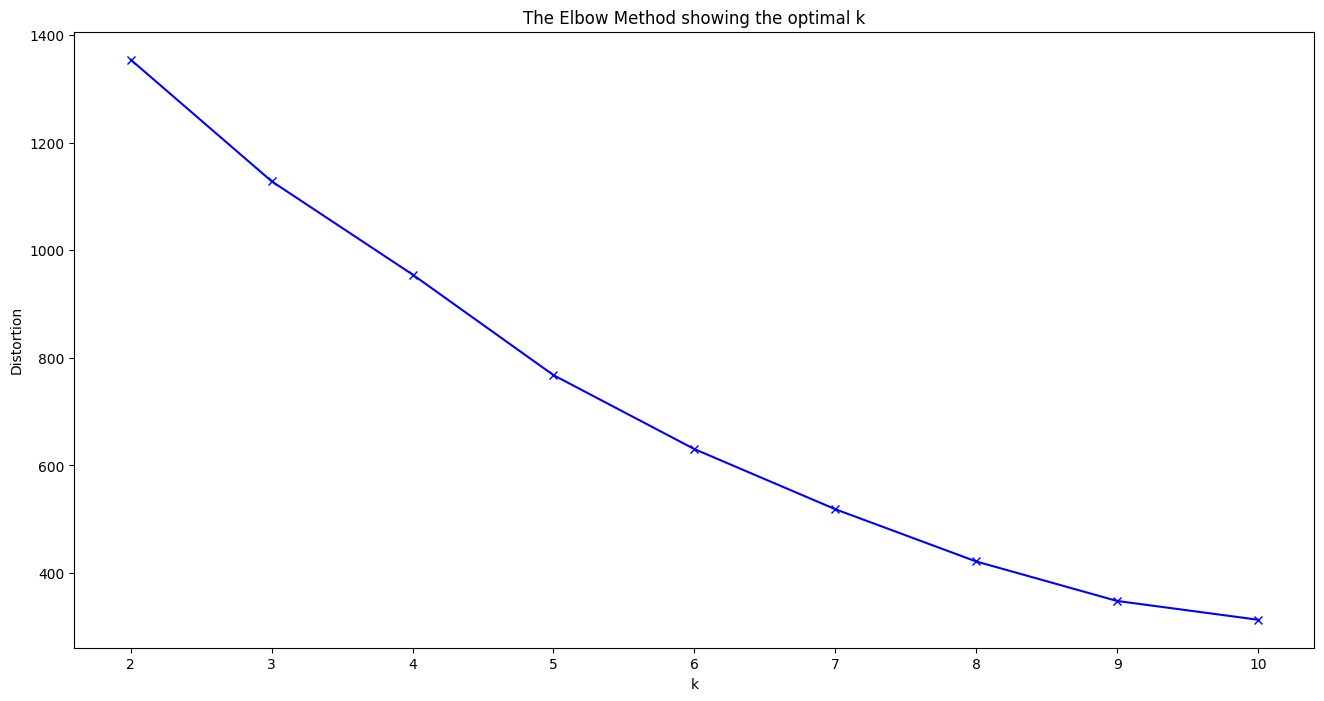

Optimal number of clusters:  10


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv('country_wise_latest.csv')

# Loại bỏ cột nhãn khỏi dữ liệu
data = data.drop('Country/Region', axis=1)

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

# Xử lý giá trị vô cùng
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Tính tổng bình phương khoảng cách
distortions = []
K = range(2, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)

# Vẽ biểu đồ phương pháp khuỷu tay
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Tìm và in ra số lượng cụm tối ưu
optimal_k = distortions.index(min(distortions)) + 2
print("Optimal number of clusters: ", optimal_k)

In [3]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['longitude', 'latitude']])

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)
df['kmeans_labels'] = kmeans.labels_

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(data_scaled)
df['dbscan_labels'] = dbscan.labels_

In [7]:
import skfuzzy as fuzz

In [9]:
import numpy as np# Chuyển dữ liệu về dạng phù hợp
data_scaled_transposed = data_scaled.T

# Số lượng cụm
n_clusters = 3

# Thực hiện Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_scaled_transposed, n_clusters, 2, error=0.005, maxiter=1000)

# Lấy nhãn cụm từ kết quả
labels = np.argmax(u, axis=0)

# Thêm nhãn cụm vào dataframe
df['fuzzy_cmeans_labels'] = labels

In [10]:
import matplotlib.pyplot as plt

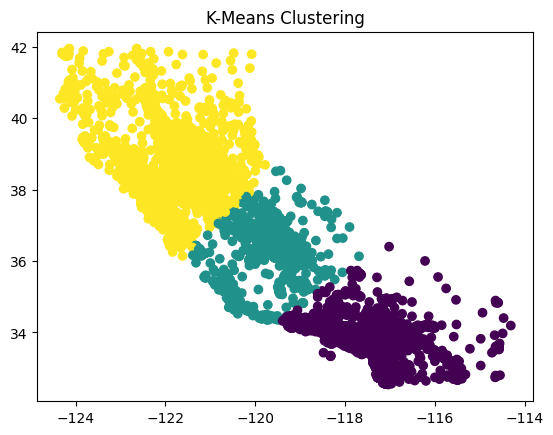

In [11]:
plt.scatter(df['longitude'], df['latitude'], c=df['kmeans_labels'])
plt.title('K-Means Clustering')
plt.show()

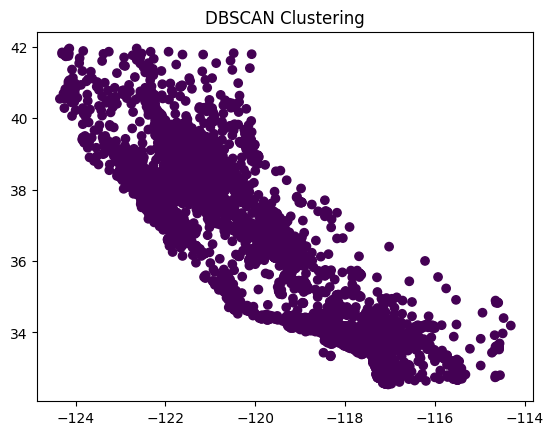

In [12]:
plt.scatter(df['longitude'], df['latitude'], c=df['dbscan_labels'])
plt.title('DBSCAN Clustering')
plt.show()

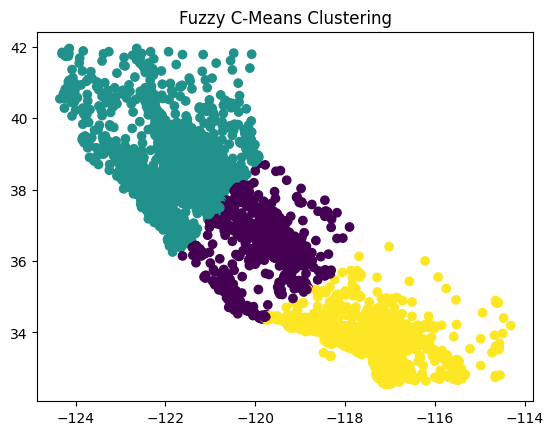

In [13]:
plt.scatter(df['longitude'], df['latitude'], c=df['fuzzy_cmeans_labels'])
plt.title('Fuzzy C-Means Clustering')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df[['longitude', 'latitude']], df['kmeans_labels'])
print('Silhouette Score: ', score)

Silhouette Score:  0.6472587571932521


In [15]:
# Tính thống kê mô tả cho dữ liệu trong mỗi cụm K-Means
df.groupby('kmeans_labels').describe()

# Tính thống kê mô tả cho dữ liệu trong mỗi cụm DBSCAN
df.groupby('dbscan_labels').describe()

# Tính thống kê mô tả cho dữ liệu trong mỗi cụm Fuzzy C-Means
df.groupby('fuzzy_cmeans_labels').describe()

longitude                                                \
                        count        mean       std     min     25%     50%   
fuzzy_cmeans_labels                                                           
0                      1841.0 -119.771380  0.600391 -121.62 -120.30 -119.76   
1                      7643.0 -121.953242  0.640238 -124.35 -122.31 -122.02   
2                     11156.0 -117.903456  0.640907 -119.79 -118.31 -118.07   

                                      latitude             ... kmeans_labels  \
                          75%     max    count       mean  ...           75%   
fuzzy_cmeans_labels                                        ...                 
0                   -119.3000 -117.90   1841.0  36.207170  ...           1.0   
1                   -121.5000 -119.92   7643.0  38.120470  ...           2.0   
2                   -117.4575 -114.31  11156.0  33.831971  ...           0.0   

                         dbscan_labels                                     
                     max         count mean  std  min  25%  50%  75%  max  
fuzzy_cmeans_labels                                                        
0                    2.0        1841.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1                    2.0        7643.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2                    1.0       11156.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 88 columns]

In [16]:
# Xem trung tâm cụm của KMeans
print(kmeans.cluster_centers_)

[[ 0.84092258 -0.84608743]
 [-0.070718    0.17339485]
 [-1.17889101  1.16180951]]


In [17]:
# Xem các mẫu ngoại lệ trong DBSCAN
outliers = df[df['dbscan_labels'] == -1]
print(outliers)

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, kmeans_labels, dbscan_labels, fuzzy_cmeans_labels]
Index: []


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

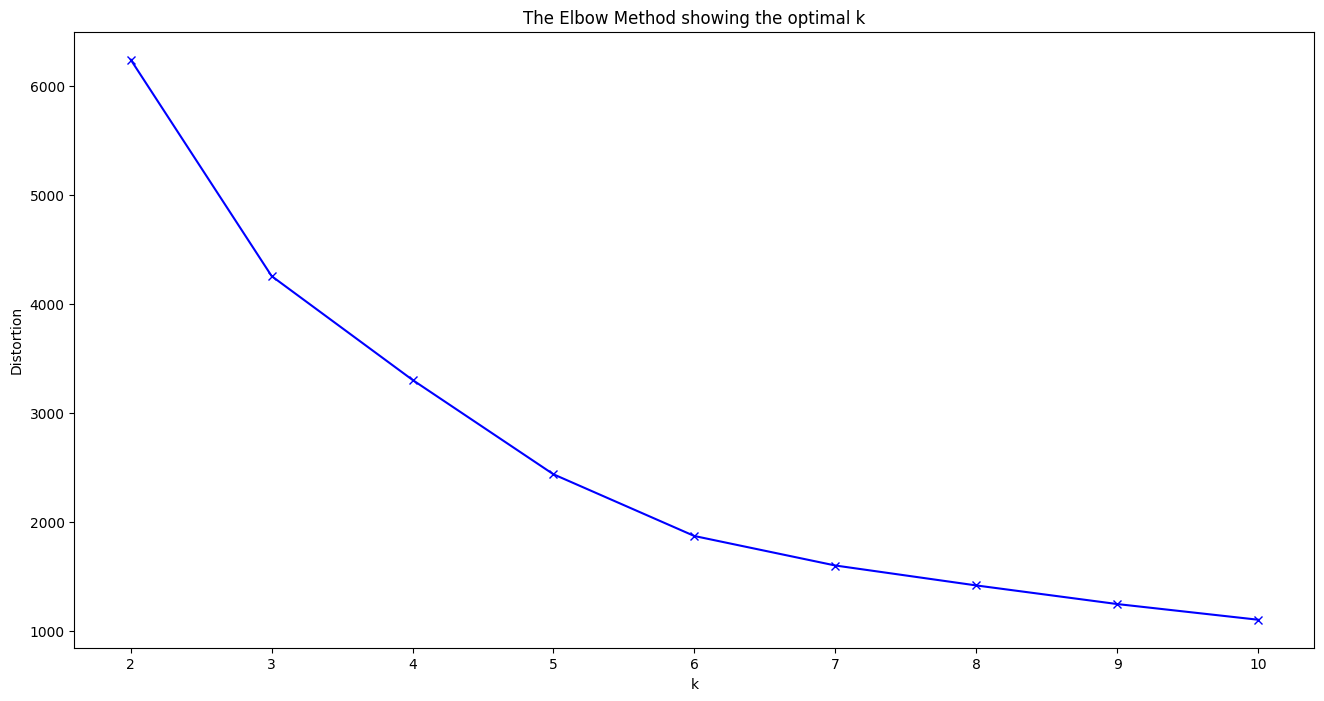

Optimal number of clusters:  10


In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
distortions = []
K = range(2, 11)

# Tính tổng bình phương khoảng cách cho mỗi giá trị của k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)

# Vẽ biểu đồ phương pháp Elbow
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Tìm và in ra số lượng cụm tối ưu
optimal_k = distortions.index(min(distortions)) + 2
print("Optimal number of clusters: ", optimal_k)

In [19]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(data_scaled)
df['kmeans_labels'] = kmeans.labels_

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(data_scaled)
df['dbscan_labels'] = dbscan.labels_

In [21]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_scaled.T, optimal_k, 2, error=0.005, maxiter=1000)
labels = np.argmax(u, axis=0)
df['fuzzy_cmeans_labels'] = labels

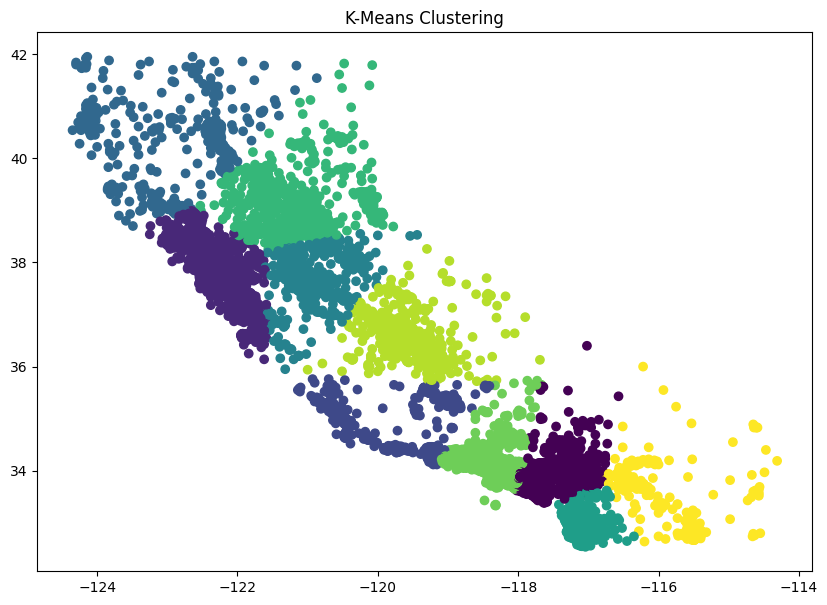

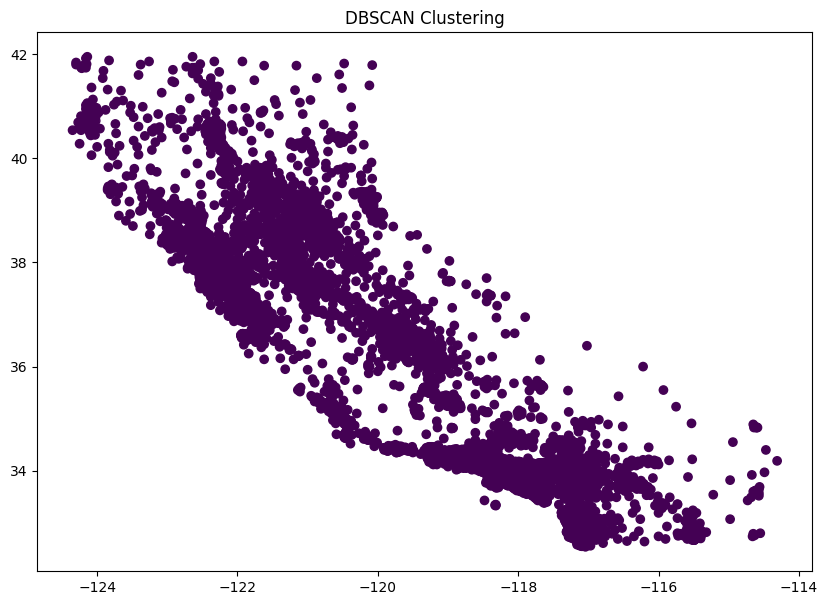

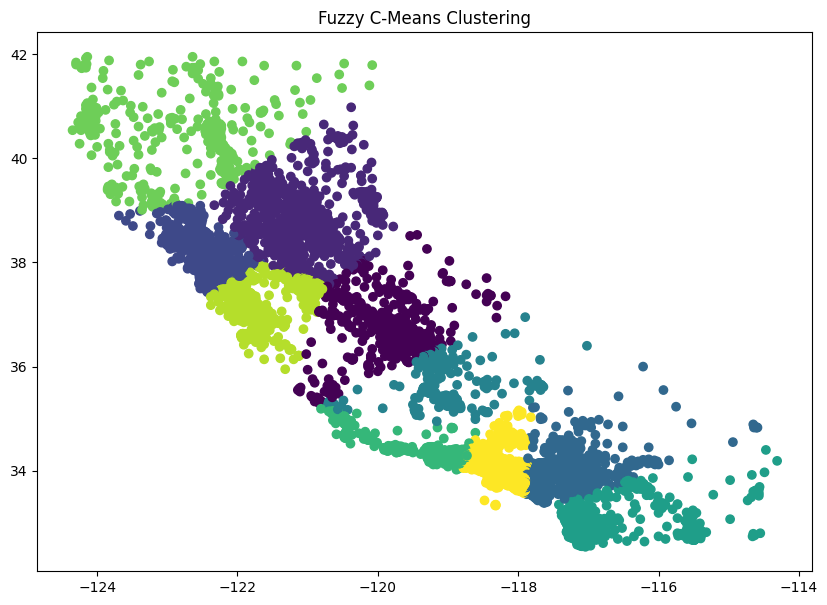

In [23]:
import matplotlib.pyplot as plt

# Trực quan hóa kết quả KMeans
plt.figure(figsize=(10, 7))
plt.scatter(df['longitude'], df['latitude'], c=df['kmeans_labels'])
plt.title('K-Means Clustering')
plt.show()

# Trực quan hóa kết quả DBSCAN
plt.figure(figsize=(10, 7))
plt.scatter(df['longitude'], df['latitude'], c=df['dbscan_labels'])
plt.title('DBSCAN Clustering')
plt.show()

# Trực quan hóa kết quả Fuzzy C-Means
plt.figure(figsize=(10, 7))
plt.scatter(df['longitude'], df['latitude'], c=df['fuzzy_cmeans_labels'])
plt.title('Fuzzy C-Means Clustering')
plt.show()

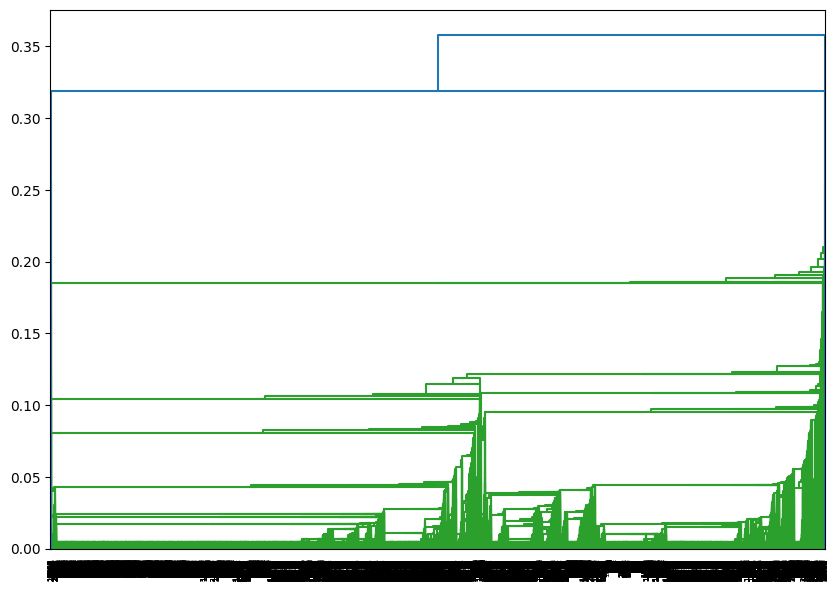

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Thực hiện phân cụm theo cấp bậc
linked = linkage(data_scaled, 'single')

# Vẽ biểu đồ Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

# Gán nhãn cụm vào dataframe
df['hierarchical_labels'] = fcluster(linked, t=optimal_k, criterion='maxclust')

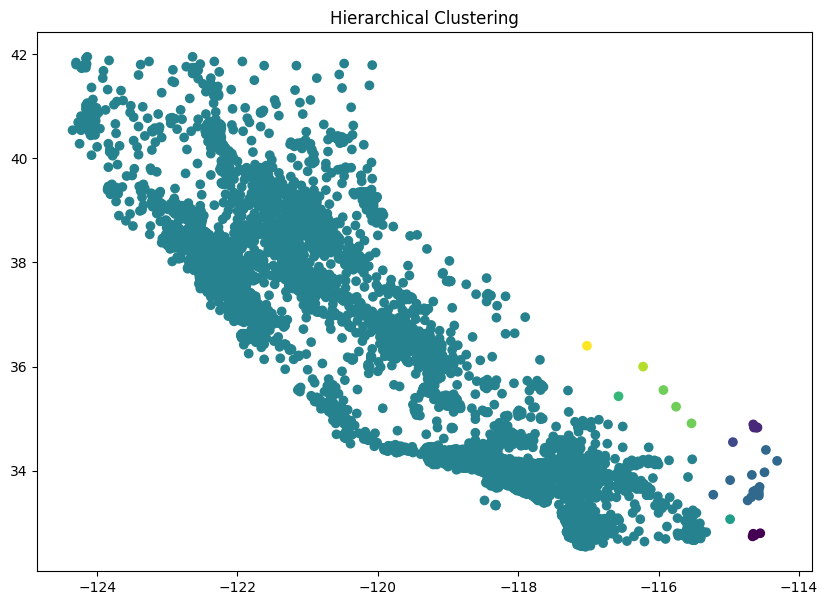

In [26]:
# Trực quan hóa kết quả phân cụm theo cấp bậc
plt.figure(figsize=(10, 7))
plt.scatter(df['longitude'], df['latitude'], c=df['hierarchical_labels'])
plt.title('Hierarchical Clustering')
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

# Tính Silhouette Score
silhouette_kmeans = silhouette_score(data_scaled, df['kmeans_labels'])

# Kiểm tra số lượng nhãn duy nhất trước khi tính toán Silhouette Score
if len(set(df['dbscan_labels'])) > 1:
    silhouette_dbscan = silhouette_score(data_scaled, df['dbscan_labels'])
else:
    silhouette_dbscan = 'N/A'

silhouette_fuzzy_cmeans = silhouette_score(data_scaled, df['fuzzy_cmeans_labels'])
silhouette_hierarchical = silhouette_score(data_scaled, df['hierarchical_labels'])

# In kết quả
print("Silhouette Score:")
print("KMeans: ", silhouette_kmeans)
print("DBSCAN: ", silhouette_dbscan)
print("Fuzzy C-Means: ", silhouette_fuzzy_cmeans)
print("Hierarchical: ", silhouette_hierarchical)

Silhouette Score:
KMeans:  0.4999215313342065
DBSCAN:  N/A
Fuzzy C-Means:  0.4712874926237252
Hierarchical:  -0.041710812587284166


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


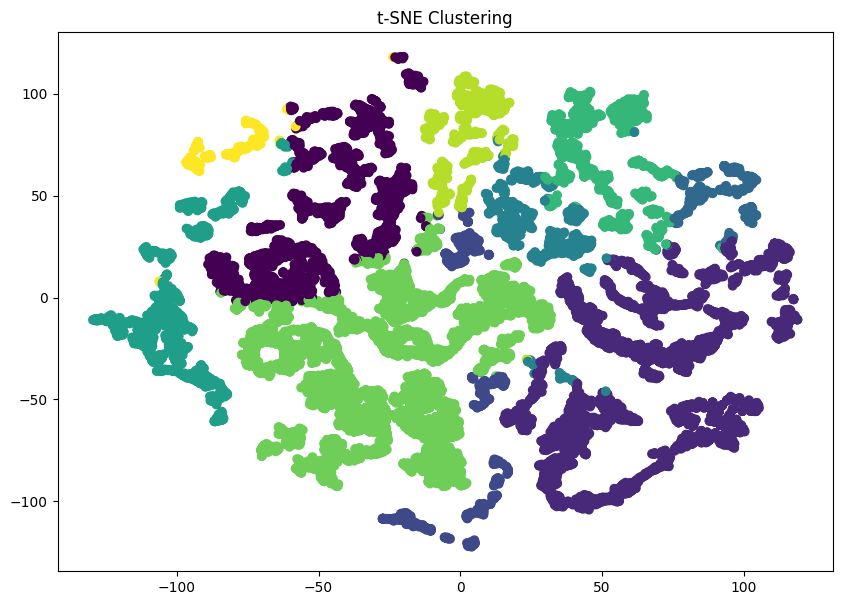

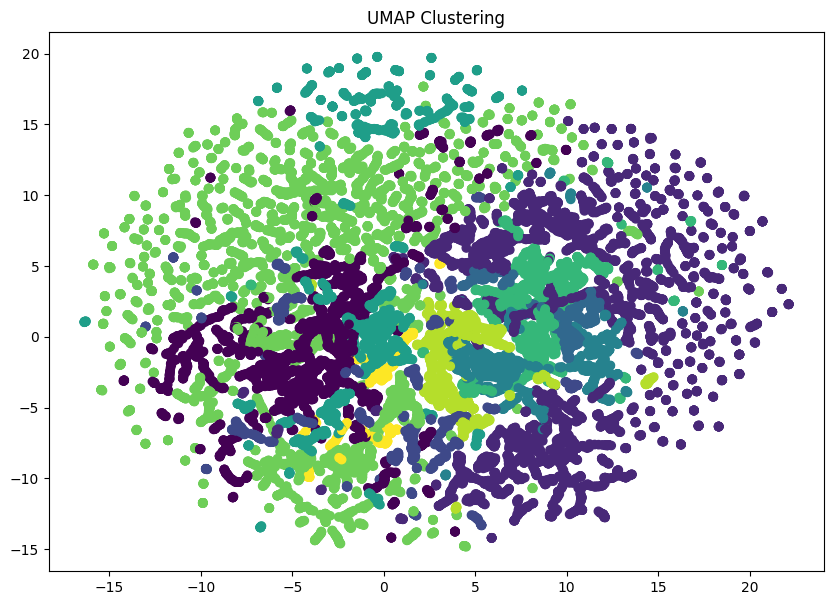

In [31]:
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Tạo mô hình t-SNE và UMAP
tsne = TSNE(n_components=2, random_state=0)
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)

# Fit và transform dữ liệu
tsne_results = tsne.fit_transform(data_scaled)
umap_results = umap_model.fit_transform(data_scaled)

# Vẽ biểu đồ t-SNE
plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['kmeans_labels'])
plt.title('t-SNE Clustering')
plt.show()

# Vẽ biểu đồ UMAP
plt.figure(figsize=(10, 7))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=df['kmeans_labels'])
plt.title('UMAP Clustering')
plt.show()

In [42]:
# Tạo mô hình t-SNE với các tham số khác nhau
tsne = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_results = tsne.fit_transform(data_scaled)

# Vẽ biểu đồ t-SNE
plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['kmeans_labels'])
plt.title('t-SNE Clustering with Perplexity 50')
plt.show()

# Tạo mô hình UMAP với các tham số khác nhau
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2)
umap_results = umap_model.fit_transform(data_scaled)

# Vẽ biểu đồ UMAP
plt.figure(figsize=(10, 7))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=df['kmeans_labels'])
plt.title('UMAP Clustering with n_neighbors 10 and min_dist 0.1')
plt.show()

KeyboardInterrupt: 

In [34]:
# Tính toán trung tâm của các cụm
centroids = kmeans.cluster_centers_

# Chuyển đổi trung tâm cụm sang không gian 2D bằng t-SNE
tsne_centroids = tsne.fit_transform(centroids)

# Vẽ biểu đồ t-SNE với trung tâm cụm
plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['kmeans_labels'])
plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], c='red')  # vẽ trung tâm cụm màu đỏ
plt.title('t-SNE Clustering with Centroids')
plt.show()

ValueError: perplexity must be less than n_samples

In [35]:
# Tính toán trung tâm của các cụm
centroids = kmeans.cluster_centers_

# Chuyển đổi trung tâm cụm sang không gian 2D bằng t-SNE
tsne_centroids = tsne.transform(centroids)

# Vẽ biểu đồ t-SNE với trung tâm cụm
plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['kmeans_labels'])
plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], c='red')  # vẽ trung tâm cụm màu đỏ
plt.title('t-SNE Clustering with Centroids')
plt.show()

AttributeError: 'TSNE' object has no attribute 'transform'

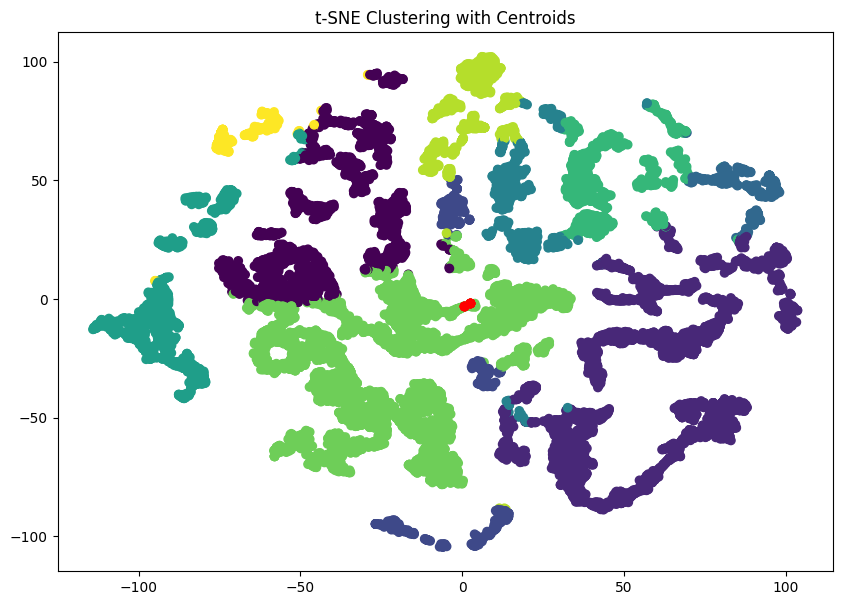

In [36]:
from scipy.spatial import cKDTree

# Tính toán trung tâm của các cụm
centroids = kmeans.cluster_centers_

# Tìm điểm gần nhất với trung tâm cụm trong không gian t-SNE
tree = cKDTree(tsne_results)
_, indices = tree.query(centroids)

tsne_centroids = tsne_results[indices]

# Vẽ biểu đồ t-SNE với trung tâm cụm
plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['kmeans_labels'])
plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], c='red')  # vẽ trung tâm cụm màu đỏ
plt.title('t-SNE Clustering with Centroids')
plt.show()

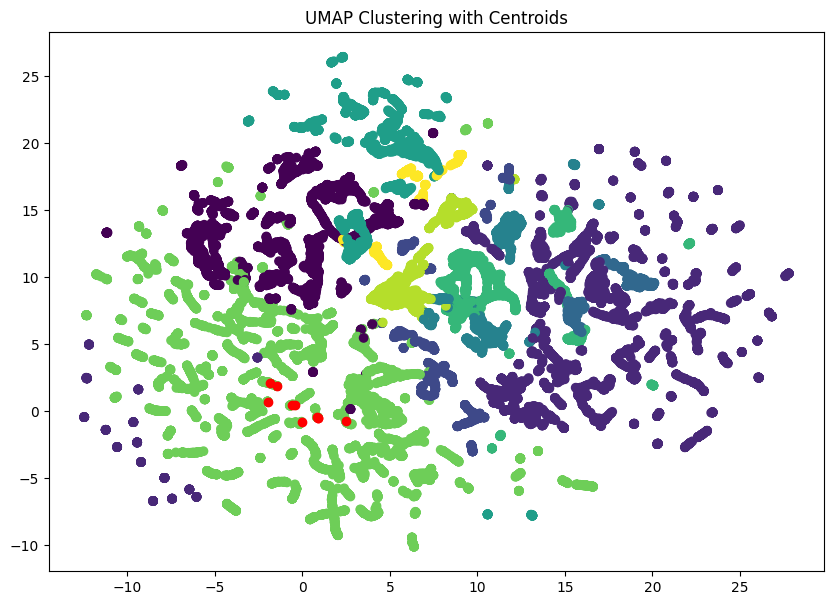

In [37]:
from scipy.spatial import cKDTree

# Tính toán trung tâm của các cụm
centroids = kmeans.cluster_centers_

# Tìm điểm gần nhất với trung tâm cụm trong không gian UMAP
tree = cKDTree(umap_results)
_, indices = tree.query(centroids)

umap_centroids = umap_results[indices]

# Vẽ biểu đồ UMAP với trung tâm cụm
plt.figure(figsize=(10, 7))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=df['kmeans_labels'])
plt.scatter(umap_centroids[:, 0], umap_centroids[:, 1], c='red')  # vẽ trung tâm cụm màu đỏ
plt.title('UMAP Clustering with Centroids')
plt.show()

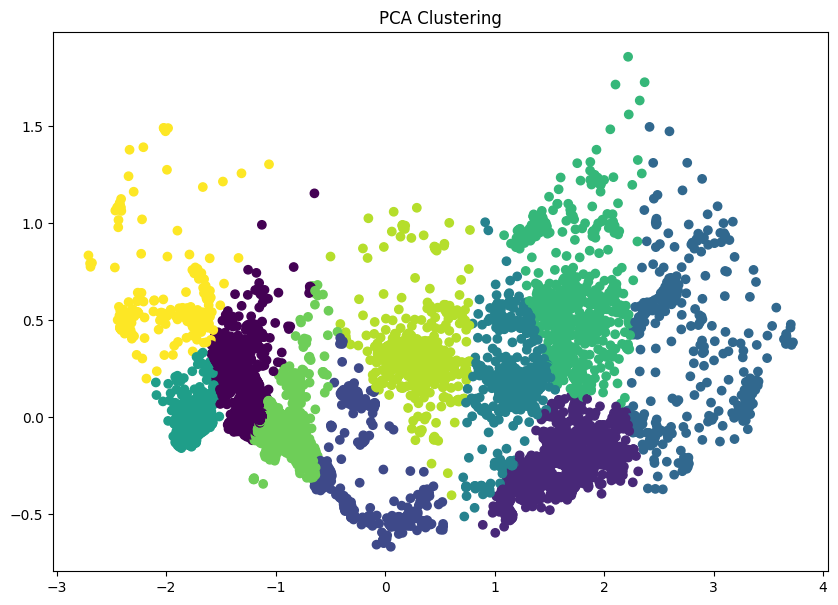

In [40]:
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

# Tạo mô hình PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_scaled)

# Vẽ biểu đồ PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=df['kmeans_labels'])
plt.title('PCA Clustering')
plt.show()



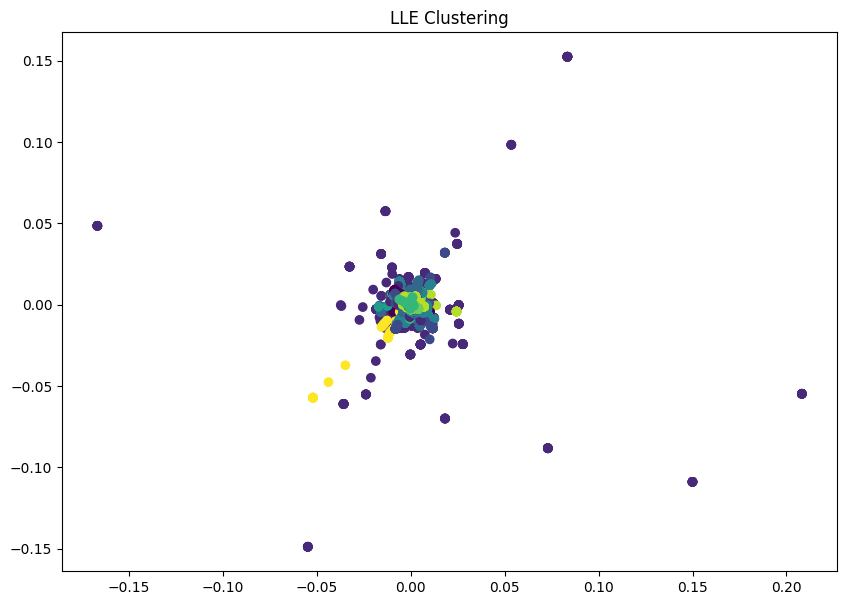

In [39]:
# Tạo mô hình LLE
lle = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')
lle_results = lle.fit_transform(data_scaled)

# Vẽ biểu đồ LLE
plt.figure(figsize=(10, 7))
plt.scatter(lle_results[:, 0], lle_results[:, 1], c=df['kmeans_labels'])
plt.title('LLE Clustering')
plt.show()

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data')

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])

# Xử lý giá trị vô cùng
crx_data.replace([np.inf, -np.inf], np.nan, inplace=True)
crx_data.fillna(crx_data.mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
crx_data_scaled = pd.DataFrame(scaler.fit_transform(crx_data), columns=crx_data.columns)

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


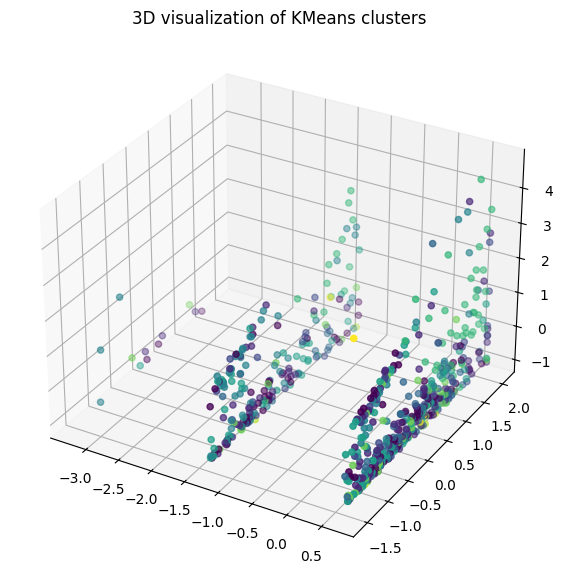

In [49]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Sử dụng KMeans để phân cụm dữ liệu
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(crx_data_scaled)
labels = kmeans.labels_

# Tạo biểu đồ 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Giả sử chúng ta sử dụng 3 cột đầu tiên từ dữ liệu để vẽ biểu đồ 3D
ax.scatter(crx_data_scaled.iloc[:, 0], crx_data_scaled.iloc[:, 1], crx_data_scaled.iloc[:, 2], c=labels)

ax.set_title('3D visualization of KMeans clusters')
plt.show()

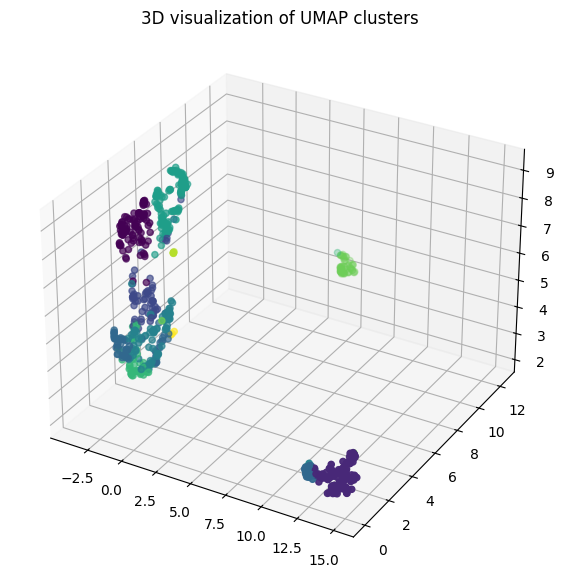

In [50]:
import umap.umap_ as umap
from mpl_toolkits.mplot3d import Axes3D

# Sử dụng UMAP để giảm chiều dữ liệu xuống còn 3
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(crx_data_scaled)

# Tạo biểu đồ 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ biểu đồ 3D với dữ liệu đã được giảm chiều
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=labels)

ax.set_title('3D visualization of UMAP clusters')
plt.show()